In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell

In [2]:
# Libraries Settings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
np.set_printoptions(suppress=True)

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 25)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
# plot function
def numerical_plotting(data, col, title, symb, ylabel, color):
    fig, ax = plt.subplots(2, 1, 
                           sharex=True, 
                           figsize=(20, 8),
                           facecolor="#FFFFFF",
                           gridspec_kw={"height_ratios": (.2, .8)})
    
    ax[0].set_facecolor("#FFFFFF")
    ax[1].set_facecolor("#FFFFFF")
    
    ax[0].set_title(title, 
                    weight="bold", 
                    fontsize=30, 
                    pad=30)
    
    sns.boxplot(x=col, 
                data=data,
                color=color,
                ax=ax[0])
    
    ax[0].set(yticks=[])
    
    sns.distplot(data[col], kde=True, color=color)
    
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    
    ax[0].set_xlabel(col, weight="bold", fontsize=15, labelpad=15)
    ax[1].set_xlabel(col, weight="bold", fontsize=15)
    ax[1].set_ylabel(ylabel, weight="bold", fontsize=15)
    
    plt.axvline(data[col].mean(), 
                color='darkgreen', 
                linewidth=2.2, 
                label='mean=' + str(np.round(data[col].mean(),1)) + symb)
    plt.axvline(data[col].median(), 
                color='red', 
                linewidth=2.2, 
                label='median='+ str(np.round(data[col].median(),1)) + symb)
    plt.axvline(data[col].max(), 
                color='blue', 
                linewidth=2.2, 
                label='max='+ str(np.round(data[col].max(),1)) + symb)
    plt.axvline(data[col].min(), 
                color='orange', 
                linewidth=2.2, 
                label='min='+ str(np.round(data[col].min(),1)) + symb)
    plt.axvline(data[col].mode()[0], 
                color='purple', 
                linewidth=2.2, 
                label='mode='+ str(data[col].mode()[0]) + symb)
    
    
    plt.legend(bbox_to_anchor=(1, 1), 
               ncol=1, 
               fontsize=17, 
               fancybox=True, 
               shadow=True, 
               frameon=False)
    
    plt.tight_layout()
    plt.show()
    
def count_pie_plot(datapie, datacount, colpiey, colcount, text1, text2, piecomap,
                   xlabel, ylabel, xticklabel, yticklabel, ystart, yend, pielabels, yplus, 
                   piefs=10, countcomap=None, pctdistance=0.65, fontsize=15, xtickrotation=None):

    # Subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                   nrows=1, 
                                   facecolor=("#FFFFFF"),
                                   figsize=(24, 8))

    datapie.plot(kind="pie", 
                 y=colpiey,
                 autopct='%1.1f%%',
                 labels=None,
                 startangle=90,
                 colors=piecomap,
                 wedgeprops=dict(width=0.15),
                 pctdistance=pctdistance,
                 fontsize=piefs,
                 ax=ax1,
                 textprops=dict(color="black", 
                                weight="bold"))
    
    sns.countplot(x=colcount,
                  data=datacount,
                  palette=countcomap,
                  ax=ax2)

    #title
    x0, x1 = ax1.get_xlim()
    y0, y1 = ax1.get_ylim()
    
    ax1.text(x0, y1 * 1.40, 
             text1, 
             fontsize=30, 
             ha="left", 
             va="center", 
             weight="bold")
    ax1.text(x0, y1 * 1.25, 
             text2, 
             fontsize=18, 
             ha="left", 
             va="center")
    
    ax1.legend(pielabels, 
               loc="upper left", 
               bbox_to_anchor=(x0*0.01, y1*0.85), 
               prop={'size': 10.5}, frameon=False, ncol=len(datapie))
    
    ax2.set_xlabel(xlabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_ylabel(ylabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_xticklabels(labels=xticklabel,
                        weight="semibold",
                        fontsize=10,
                        rotation=xtickrotation)
    ax2.set_yticklabels(labels=yticklabel,
                        weight="semibold",
                        fontsize=10)

    # data label
    i=0

    for p in ax2.patches:
        value = f"{p.get_height()}"
        if (i < 2):
            y1 = -2
        else:
            y1 = 2
        i += 1
        x = p.get_x() + p.get_width() / 2 
        y = p.get_y() + p.get_height() + yplus
        ax2.text(x, y, value, ha="center", va="center", fontsize=15, weight="semibold") 

    ax2.set_ylim(ystart, yend)
    ax2.set_facecolor("#FFFFFF")
    ax1.set_ylabel(None)
    
    plt.tight_layout()
    return fig

def countplot_y(data, xplus, coly, sizey, text1, text2, 
                xlabel, ylabel, xstart, xend, ytimes1, ytimes2):

    fig, ax = plt.subplots(ncols=1,
                           nrows=1,
                           facecolor=("#FFFFFF"),
                           figsize=(24, sizey))

    sns.countplot(y=coly,
                  data=data,
                  palette=['#E0144C', '#FF5858', '#3AB0FF', '#FFB562', '#6FEDD6', '#6D9885'],
                  ax=ax)

    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()

    ax.text(x0, y1 * ytimes1, 
            text1, fontsize=30, 
            ha="left", va="center", weight="bold")
    ax.text(x0, y1 * ytimes2, 
            text2, fontsize=18, 
            ha="left", va="center")

    plt.xticks(weight="bold",
               fontsize=10)
    plt.yticks(weight="bold",
               fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=25, labelpad=20)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=25, labelpad=20)

    # data label
    i=0

    for p in ax.patches:
        value = f'{p.get_width()}'
        if i < 7:
            x1 = -1.2
        else:
            x1 = 1.2

        i+=1
        x = p.get_x() + p.get_width() + xplus
        y = p.get_y() + p.get_height() -.4
        ax.text(x, y, value, ha='center', va='center', fontsize=15, weight='semibold') 

    plt.tight_layout()
    ax.set_xlim(xstart, xend)
    ax.set_facecolor("#FFFFFF")
    
    return fig

def bivariate_numerical_plot(data, x, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(20, 6), 
                           facecolor="#FFFFFF")
    sns.kdeplot(data=data, 
                x=x, 
                hue=hue, 
                fill=True)
    
    ax.set_facecolor("#FFFFFF")
    
    plt.title(title, weight="bold", 
              fontsize=25, pad=30)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=15, labelpad=15)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=15, labelpad=15)
    plt.tight_layout()
    plt.show()
    
def mtvboxplot(data, x, y, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(24, 8))
    sns.boxplot(x=x, y=y, hue=hue, 
                data=data, ax=ax)
    plt.title(title, weight="bold", 
              fontsize=25, pad=25)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=15, labelpad=10)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=15, labelpad=10)
    plt.tight_layout()
    plt.show()

In [4]:
# stat function

def spearman_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Spearman's Correlation
    coef, p = stats.spearmanr(data1, data2)
    print(f"Spearmans correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()
    
def pearson_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Pearson's Correlation
    coef, p = stats.pearsonr(data1, data2)
    print(f"Pearson correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()
    
def skew_kurtosis(data, title):
    skw = stats.skew(data, bias=False)
    kurt = stats.kurtosis(data, bias=False)
    
    print("-" * 20, title, "-" * 20)
    print(f"Skewness: {skw}")
    if (skw < -1) and (skw > 1):
        print("Highly skewed")
    elif (-1 < skw < -0.5) or (1 < skw < 0.5):
        print("Moderately skewed")
    elif (-0.5 < skw < 0.5):
        print("Approximately symmetric")
    print("-" * 35)
    print(f"Kurtosis: {kurt}")
    if (kurt > 1):
        print("The distribution is too peaked")
    elif (kurt < -1):
        print("The distribution is too flat")
    else:
        print("The distribution is non-normal")
    print("-" * 35)
    
def chebychev(data, title, interpret):
    mu = round(data.mean(), 1)
    s = round(data.std(), 1)
    
    fc = round(mu - (2 * s), 1)
    sc = round(mu + (2 * s), 1)
    
    print("-" * 20, f"Interpretation of {title}", "-" * 20)
    print(f"first calc: {fc}")
    print(f"second calc: {sc}")
    print(interpret)
    print("-" * 40)

In [5]:
df_test = pd.read_csv('data/loan_sanction_test.csv')
df_train = pd.read_csv('data/loan_sanction_train.csv')

In [6]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000,NaN,360.000,1.000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000,128.000,360.000,1.000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000,66.000,360.000,1.000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000,120.000,360.000,1.000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000,141.000,360.000,1.000,Urban,Y


In [7]:
def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(5))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_train)

##################### Shape #####################
(614, 13)
##################### Types #####################
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
##################### Head #####################
    Loan_ID Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0  LP001002   Male      No          0      Graduate            No             5849   
1  LP001003   Male     Yes          1      Graduate            No             4583   
2  LP001005   Male     Yes          0      Graduate           Yes             3000   
3  LP001006   Male     Yes          0  Not Graduate            No             2583   
4  LP001008   Male  

## Data cleaning

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

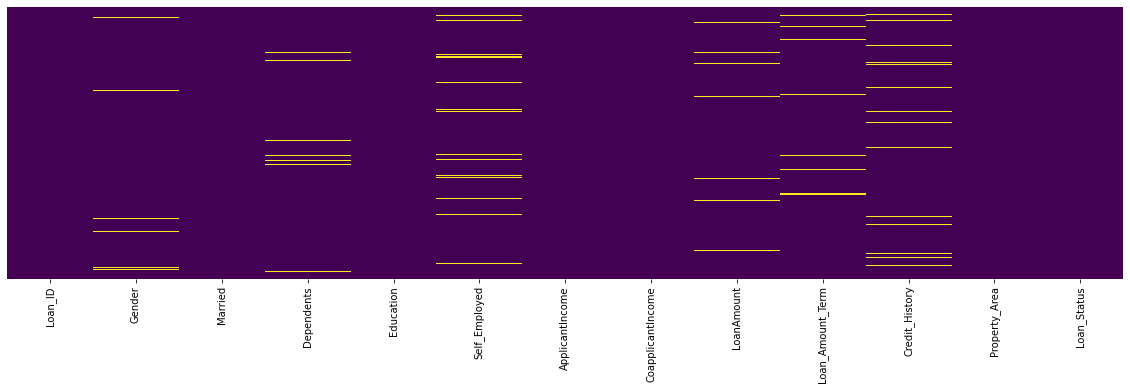

In [8]:
#plotout columns with missing data
plt.figure(figsize=(20,5))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.plot

In [9]:
#column names to lower case
df_train.columns = df_train.columns.str.lower()
df_train.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history',
       'property_area', 'loan_status'],
      dtype='object')

In [10]:
df_train.self_employed.value_counts()

No     500
Yes     82
Name: self_employed, dtype: int64

In [11]:
df_train.credit_history.value_counts()

1.000    475
0.000     89
Name: credit_history, dtype: int64

In [12]:
df_train.loan_amount_term.value_counts()

360.000    512
180.000     44
480.000     15
300.000     13
240.000      4
84.000       4
120.000      3
60.000       2
36.000       2
12.000       1
Name: loan_amount_term, dtype: int64

In [13]:
df_train.loanamount.value_counts()

120.000    20
110.000    17
100.000    15
160.000    12
187.000    12
           ..
240.000     1
214.000     1
59.000      1
166.000     1
253.000     1
Name: loanamount, Length: 203, dtype: int64

In [14]:
df_train.dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: dependents, dtype: int64

In [15]:
df_train.gender.value_counts()

Male      489
Female    112
Name: gender, dtype: int64

In [16]:
#Find the total number of missing values from the entire dataset
df_train.isnull().sum().sum()

149

#### How many missing data points do we have?

###### Ok, now we know that we do have some missing values. Let's see how many we have in each column.

In [17]:
# get the number of missing data points per column
missing_values_count = df_train.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count[0:14]

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [18]:
# how many total missing values do we have?
total_cells = np.product(df_train.shape)
total_missing = missing_values_count.sum()
# percent of data that is missing
percent_missing = (total_missing / total_cells) * 100
print(f"{percent_missing:.2f}%")

1.87%


### Filling out missing data
For categorical columns, we shall use mode to fillout all missing values

In [19]:
#Replace the missing values for categorical columns with mode
df_train['gender'] = df_train['gender'].fillna(df_train['gender'].mode()[0])
df_train['married'] = df_train['married'].fillna(df_train['married'].mode()[0])
df_train['self_employed'] = df_train['self_employed'].fillna(df_train['self_employed'].mode()[0])
df_train.isnull().sum()

loan_id               0
gender                0
married               0
dependents           15
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

For numerical columns, we have to first do outlier analysis. for columns with outliers we use medium of the series to fill out missing data and for data with no outliers we use mean

In [20]:
#Checking for outliers in loan_amount_term column
def detect_outliers(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

In [21]:
print(detect_outliers(df_train['loan_amount_term']))

[]


In [22]:
df_train.loan_amount_term.value_counts()

360.000    512
180.000     44
480.000     15
300.000     13
240.000      4
84.000       4
120.000      3
60.000       2
36.000       2
12.000       1
Name: loan_amount_term, dtype: int64

our function above returns no outliers, but by observation we have 480 which is isolated from the rest of the values, so not to tamper alot with data integrity we shall use medium to fill missing data

In [23]:
#our function above returns no outliers, but by observation we have 480 which is isolated from the rest of the values, so not to tamper alot with data integrity we shall use medium to fill missing data
df_train['loan_amount_term']= df_train['loan_amount_term'].fillna(df_train['loan_amount_term'].median())

In [24]:
df_train.isnull().sum()

loan_id               0
gender                0
married               0
dependents           15
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term      0
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [25]:
#Checking for outliers in credit_history column
print(detect_outliers(df_train['credit_history']))

[]


In [26]:
#Checking for outliers in loanamount column
print(detect_outliers(df_train['loanamount']))

[]


We are using mean to fillout missing values since we see no outliers

In [27]:
#Replace the missing values for numerical columns with mean
df_train['loanamount'] = df_train['loanamount'].fillna(df_train['loanamount'].mean())
df_train['credit_history'] = df_train['credit_history'].fillna(df_train['credit_history'].mean())

In [28]:
df_train.isnull().sum()

loan_id               0
gender                0
married               0
dependents           15
education             0
self_employed         0
applicantincome       0
coapplicantincome     0
loanamount            0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

In [29]:
#Replace the missing value with '0' using 'fiilna' method
df_train['dependents'] = df_train['dependents'].fillna(0)
df_train['dependents'].isnull().sum()

0

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

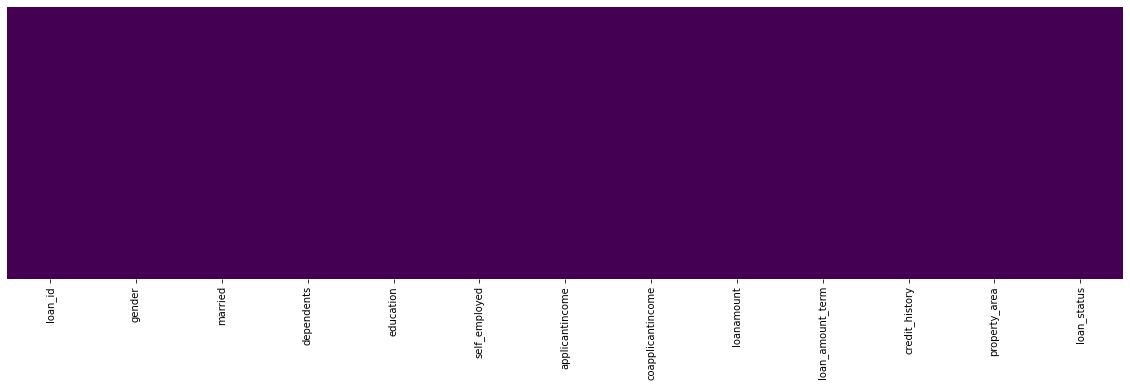

In [30]:
#plotout columns with missing data
plt.figure(figsize=(20,5))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.plot

In [31]:
df_train.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history',
       'property_area', 'loan_status'],
      dtype='object')

In [32]:
df_train.property_area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [33]:
df_train.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.000,146.412,360.000,1.000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000,128.000,360.000,1.000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000,66.000,360.000,1.000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000,120.000,360.000,1.000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000,141.000,360.000,1.000,Urban,Y


In [34]:
df_train.loan_status.unique()

array(['Y', 'N'], dtype=object)

<AxesSubplot:title={'center':'applicantincome'}, xlabel='loan_status'>

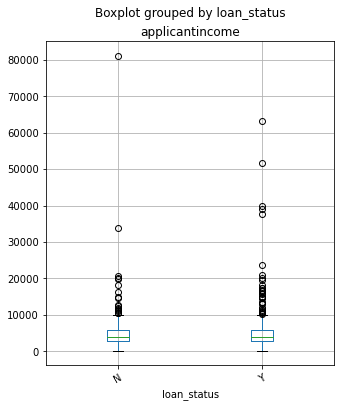

In [35]:
df_train.boxplot('applicantincome','loan_status',rot = 30,figsize=(5,6))


In [36]:
#getting the actual number of distinct values.
print(df_train['loan_status'].value_counts().count())

2


In [37]:
df_train.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.000,146.412,360.000,1.000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000,128.000,360.000,1.000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000,66.000,360.000,1.000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000,120.000,360.000,1.000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000,141.000,360.000,1.000,Urban,Y


#### Encoding loan status using  scikit-learn's LabelEncode

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
lb_make = LabelEncoder()
df_train['loan_status'] = lb_make.fit_transform(df_train['loan_status'])

In [40]:
df_train.loan_status.unique()

array([1, 0])

## Data Analysis

#### Descriptive Statistics

In [41]:
df_train.describe(exclude=[np.number])

,loan_id,gender,married,dependents,education,self_employed,property_area
count,614,614,614,614,614,614,614
unique,614,2,2,5,2,2,3
top,LP001002,Male,Yes,0,Graduate,No,Semiurban
freq,1,502,401,345,480,532,233


In [42]:
df_train.describe(include=[np.number])

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_status
count,614.000,614.000,614.000,614.000,614.000,614.000
mean,5403.459,1621.246,146.412,342.410,0.842,0.687
std,6109.042,2926.248,84.037,64.429,0.350,0.464
min,150.000,0.000,9.000,12.000,0.000,0.000
25%,2877.500,0.000,100.250,360.000,1.000,0.000
50%,3812.500,1188.500,129.000,360.000,1.000,1.000
75%,5795.000,2297.250,164.750,360.000,1.000,1.000
max,81000.000,41667.000,700.000,480.000,1.000,1.000


In [43]:
# Grouping education by its income in min, max, and mean
df_train.groupby("education")["applicantincome"].agg(["min", "max", "mean"]).sort_values(by="max", ascending=False).T

education,Graduate,Not Graduate
min,150.000,210.000
max,81000.000,18165.000
mean,5857.433,3777.284


In [44]:
# Grouping propertyarea by its income in min, max, and mean
df_train.groupby("property_area")["applicantincome"].agg(["min", "max", "mean"]).sort_values(by="max", ascending=False).T

property_area,Rural,Urban,Semiurban
min,150.000,416.000,210.000
max,81000.000,63337.000,39999.000
mean,5554.084,5398.248,5292.262


In [45]:
df_train.groupby("gender")["applicantincome"].agg(["min", "max", "mean"]).sort_values(by="max", ascending=False).T

gender,Male,Female
min,150.000,210.000
max,81000.000,19484.000
mean,5573.018,4643.473


In [46]:
# The average loan percentage of each gender
df_train.groupby(["gender"]).loan_status.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

gender,Male,Female
loan_status,69.124,66.964


In [47]:
# The average loan percentage of each number of dependants
df_train.groupby(["dependents"]).loan_status.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

dependents,2,0,1,3+,0
loan_status,75.248,68.986,64.706,64.706,60.000


## Univariate Analysis

#### Chebychev's Theorem
Chebyshev's Theorem estimates the minimum proportion of observations
that fall within a specified number of standard deviations from the mean.
This theorem applies to a broad range of probability distributions.
Chebyshev's Theorem is also known as Chebyshev's Inequality
###### About skewness:
As a general rule of thumb: If skewness is less than −1 or greater than 1 , the distribution is highly skewed.
If skewness is between −1 and −0.5 or between 0.5 and 1 , the distribution is moderately skewed.
If skewness is between −0.5 and 0.5 , the distribution is approximately symmetric.
#### About kurtosis:
For kurtosis, the general guideline is that if the number is greater than +1 , the distribution is too peaked.
Likewise, a kurtosis of less than −1 indicates a distribution that is too flat.
Distributions exhibiting skewness and/or kurtosis that exceed these guidelines are considered non-normal.

#### Numerical Column

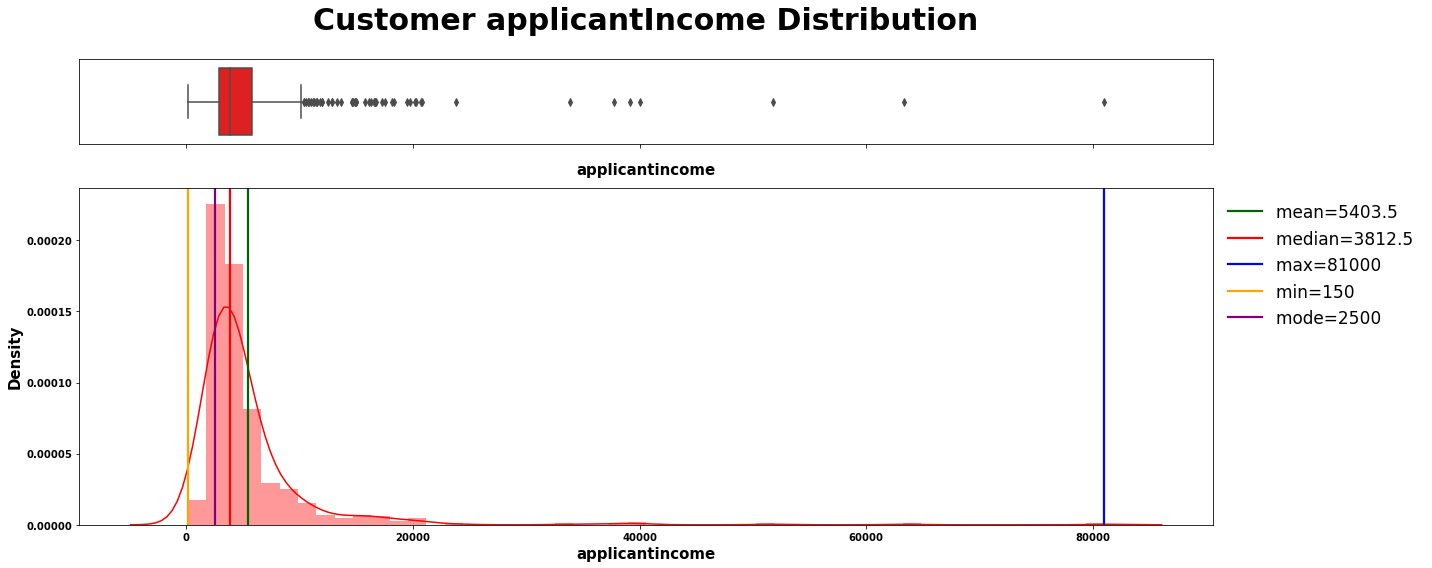

In [48]:
numerical_plotting(data=df_train, col="applicantincome", 
                   title="Customer applicantIncome Distribution", 
                   symb=" ", ylabel="Density", color="red");

In [50]:
chebychev(df_train.applicantincome, title="Income", 
          interpret=f"at least 75% customer income is lies between 0 and 17621.5 Shillings")

-------------------- Interpretation of Income --------------------
first calc: -6814.5
second calc: 17621.5
at least 75% customer income is lies between 0 and 17621.5 Shillings
----------------------------------------


In [51]:
skew_kurtosis(df_train.applicantincome, "Skew & Kurtosis Income")

-------------------- Skew & Kurtosis Income --------------------
Skewness: 6.539513113994624
-----------------------------------
Kurtosis: 60.54067593369114
The distribution is too peaked
-----------------------------------


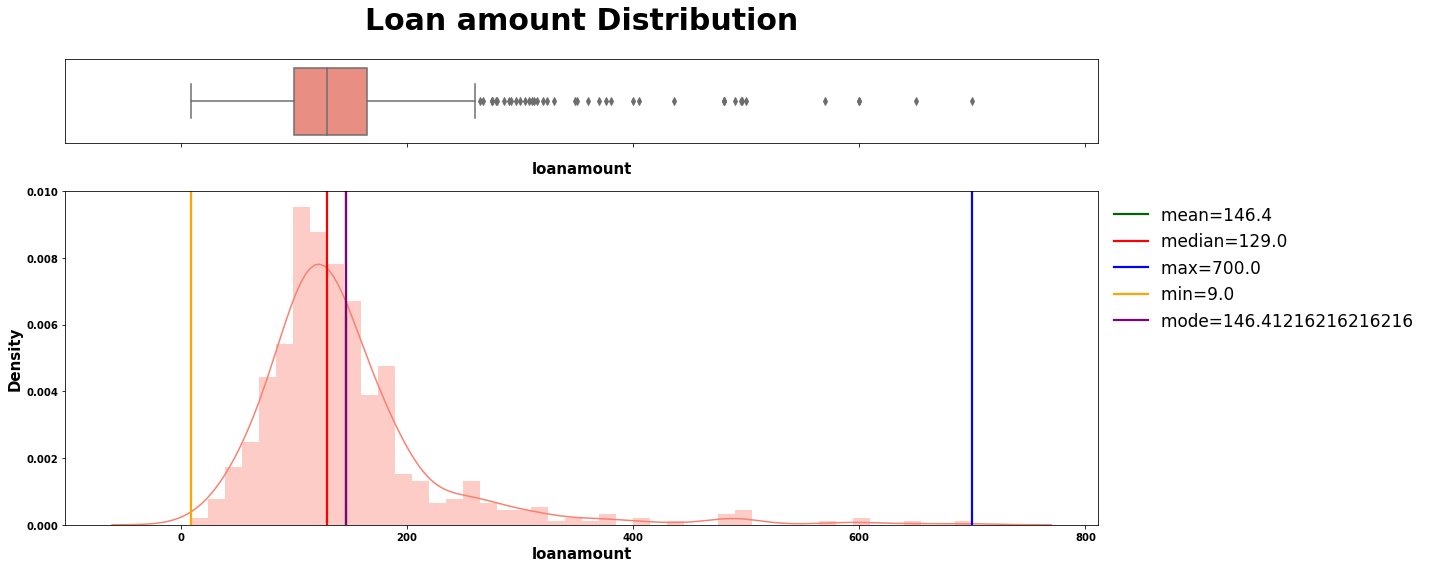

In [52]:
numerical_plotting(data=df_train, col="loanamount", 
                   title="Loan amount Distribution", 
                   symb=" ", ylabel="Density", color="salmon");

In [54]:
chebychev(df_train.loanamount, title="LoanAmount", 
          interpret=f"at least 75% customer age is lies between 0 and 314")

-------------------- Interpretation of LoanAmount --------------------
first calc: -21.6
second calc: 314.4
at least 75% customer age is lies between 0 and 314
----------------------------------------
